# Comprehensive Machine Learning Models Comparison
## Breast Cancer Prediction Classification with Model Persistence

This notebook provides a comprehensive comparison of multiple machine learning algorithms for breast cancer classification using the Wisconsin Breast Cancer dataset. It includes:

- **Shared Data Processing Pipeline**: Consistent data preprocessing for all models
- **Multiple ML Algorithms**: Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest
- **Model Persistence**: Save/Load functionality for trained models
- **Comprehensive Evaluation**: Performance metrics, visualizations, and cross-validation
- **Hyperparameter Tuning**: Optimization for best performing models
- **Feature Analysis**: Importance analysis and model interpretability

**Maintainable Code Structure**: All models use the same preprocessing pipeline and evaluation framework to ensure consistency and reduce code duplication.

## 1. Import Required Libraries

In [2]:
# Import all our custom modules from utils package
from utils import (
    # Data processing
    load_and_explore_data, 
    preprocess_data,
    
    # Model training  
    train_and_evaluate_model, 
    analyze_feature_importance, 
    optimize_knn_k,
    
    # Visualization
    plot_confusion_matrix, 
    plot_decision_boundary, 
    plot_feature_importance,
    plot_knn_analysis, 
    plot_svm_comparison, 
    plot_tree_models_comparison,
    
    # Model persistence
    save_model, 
    load_model, 
    save_all_models, 
    load_model_by_name,
    
    # Model comparison
    create_comparison_dataframe, 
    display_detailed_comparison,
    plot_comprehensive_comparison, 
    generate_model_summary_report,
    create_performance_radar_chart,
    
    # Medical analysis
    analyze_medical_errors,
    plot_medical_error_analysis,
    generate_medical_recommendations,
    print_medical_recommendations,
    
    # CAP analysis
    calculate_cap_analysis,
    plot_cap_analysis,
    print_cap_recommendations
)

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ All modules imported successfully from utils package!")
print("📦 Available modules:")
print("   • Data Processing: load_and_explore_data, preprocess_data")
print("   • Model Training: train_and_evaluate_model, analyze_feature_importance, optimize_knn_k")  
print("   • Visualization: plot_confusion_matrix, plot_decision_boundary, etc.")
print("   • Model Persistence: save_model, load_model, save_all_models, load_model_by_name")
print("   • Model Comparison: create_comparison_dataframe, plot_comprehensive_comparison, etc.")
print("   • Medical Analysis: analyze_medical_errors, plot_medical_error_analysis, etc.")
print("   • CAP Analysis: calculate_cap_analysis, plot_cap_analysis, etc.")

✅ All modules imported successfully from utils package!
📦 Available modules:
   • Data Processing: load_and_explore_data, preprocess_data
   • Model Training: train_and_evaluate_model, analyze_feature_importance, optimize_knn_k
   • Visualization: plot_confusion_matrix, plot_decision_boundary, etc.
   • Model Persistence: save_model, load_model, save_all_models, load_model_by_name
   • Model Comparison: create_comparison_dataframe, plot_comprehensive_comparison, etc.
   • Medical Analysis: analyze_medical_errors, plot_medical_error_analysis, etc.
   • CAP Analysis: calculate_cap_analysis, plot_cap_analysis, etc.


## 2. Data Loading and Exploration

In [3]:
# Load and explore the dataset
dataset_path = "../Dataset/breast_cancer_wisconsin.csv"
dataset, feature_names = load_and_explore_data(dataset_path)

print("✅ Data loaded and explored successfully!")
print(f"Dataset shape: {dataset.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of samples: {dataset.shape[0]}")

Dataset Information:
Dataset shape: (699, 10)
Number of features: 8
Number of samples: 699

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB

First 5 rows:
   Clump_thickness  Uniform

## 3. Data Preprocessing Pipeline

In this project feature scaling only applies to the features
- The model dont care the output is 0 or 1, just 2 or 4

In [4]:
# Preprocess data using our module
X_train, X_test, y_train, y_test, scaler = preprocess_data(dataset, feature_names)

print("✅ Data preprocessing completed successfully!")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Number of features: {len(feature_names)}")

Number of null data after processing:
__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Declaring features and dependent variables...
On the features, remove the 'Sample code number' because it is not relevant to the prediction
Features (X) shape: (683, 8)
Target (y) shape: (683,)

Splitting the dataset into Training set and Test set...
DataSet Splitting:
_______________________________
X_train:  4368
X_test:  1096
y_train: 546
y_test 137

Feature Scaling...
Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 8)
X_test shape: (137, 8)

Training set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747,

## 4. Model Training and Evaluation Framework

In [5]:
# Initialize results storage
model_results = {}
all_models = {}

print("✅ Model training framework ready!")
print("Using functions from model_trainer.py:")
print("- train_and_evaluate_model(): Train and evaluate any model")
print("Using functions from visualizer.py:")  
print("- plot_confusion_matrix(): Visualize confusion matrix")
print("- plot_decision_boundary(): Show decision boundary")
print("Storage:")
print("- model_results: Dictionary to store all results")
print("- all_models: Dictionary to store trained models")

✅ Model training framework ready!
Using functions from model_trainer.py:
- train_and_evaluate_model(): Train and evaluate any model
Using functions from visualizer.py:
- plot_confusion_matrix(): Visualize confusion matrix
- plot_decision_boundary(): Show decision boundary
Storage:
- model_results: Dictionary to store all results
- all_models: Dictionary to store trained models


## 5. Logistic Regression Implementation

In [6]:
training_logistic_regression = 1
if training_logistic_regression == 1:
    # Create and train Logistic Regression model
    logistic_model = LogisticRegression(random_state=0)
    lr_results = train_and_evaluate_model(
        logistic_model, "Logistic Regression", 
        X_train, X_test, y_train, y_test
    )

    # Store results
    model_results['Logistic Regression'] = lr_results
    all_models['Logistic Regression'] = logistic_model


Training and Evaluating: Logistic Regression
Training Time: 0.0087 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9492
Recall: 0.9489
F1-Score: 0.9490
ROC AUC: 0.9929
Overfitting: 0.0218

Confusion Matrix:
[[83  4]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137

Training Time: 0.0087 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9492
Recall: 0.9489
F1-Score: 0.9490
ROC AUC: 0.9929
Overfitting: 0.0218

Confusion Matrix:
[[83  4]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
  

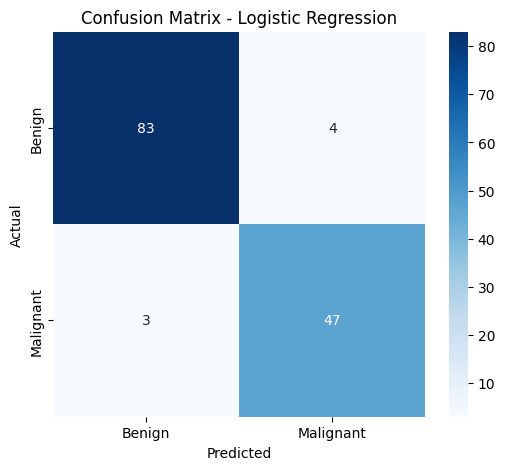

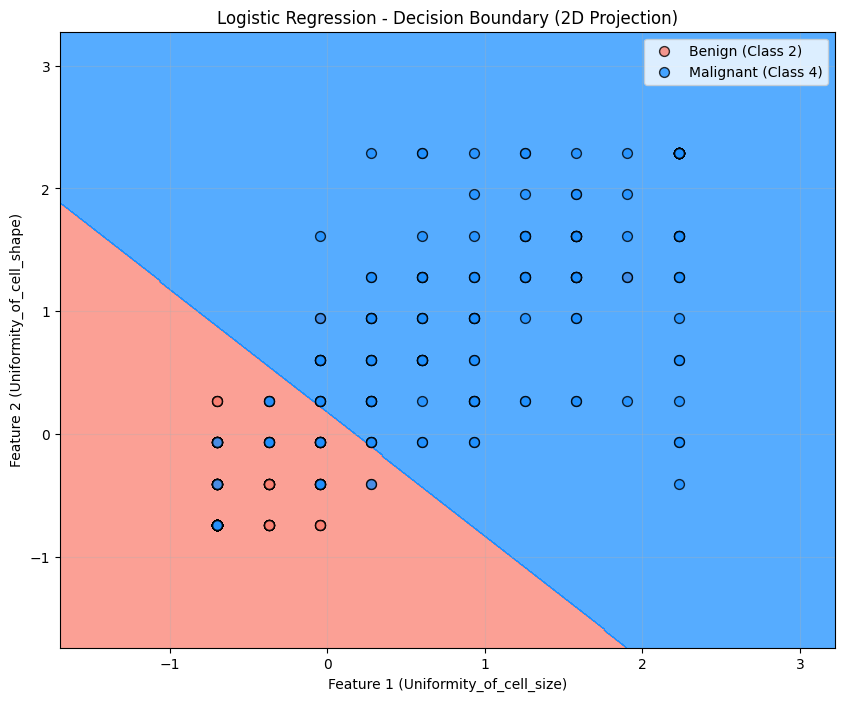

In [7]:
# Visualize Logistic Regression results using our modules
plot_confusion_matrix(lr_results, figsize=(6, 5))
plot_decision_boundary(logistic_model, "Logistic Regression", X_train, y_train, feature_names)


Logistic Regression Feature Importance Analysis:
Top 5 Important Features (by absolute coefficient):
1. Bare_nuclei              :   1.4235 (|1.4235|)
2. Bland_chromatin          :   1.0878 (|1.0878|)
3. Uniformity_of_cell_shape :   0.9193 (|0.9193|)
4. Normal_nucleoli          :   0.8379 (|0.8379|)
5. Mitoses                  :   0.7110 (|0.7110|)


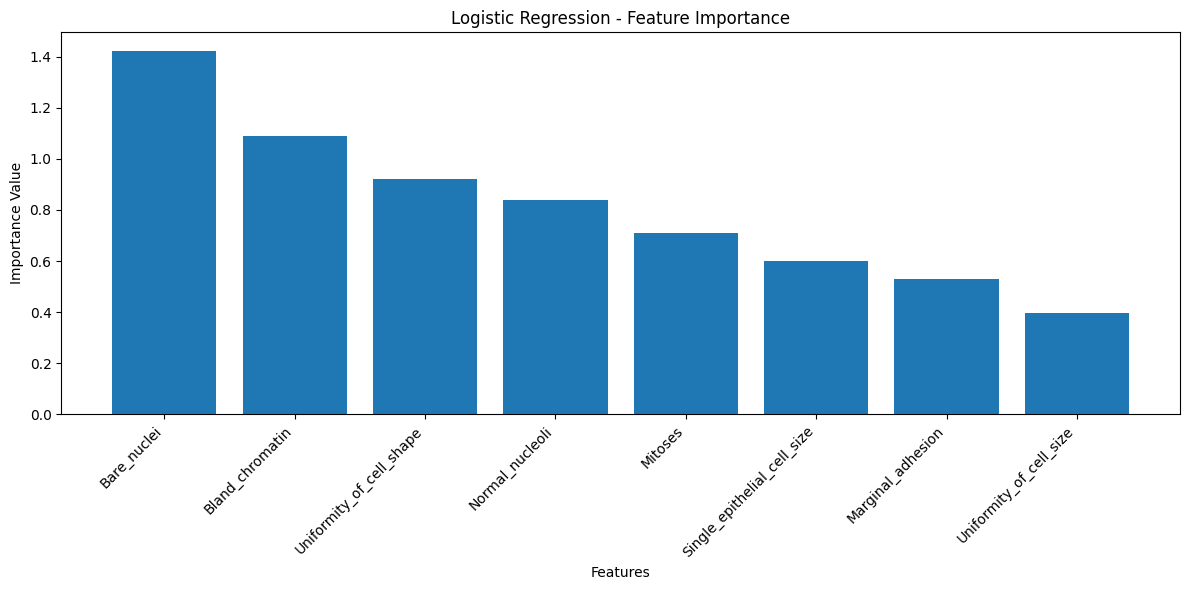


Logistic Regression Summary:
✓ Test Accuracy: 0.9489
✓ F1-Score: 0.9490
✓ Training Time: 0.0087s
✓ Overfitting: 0.0218


In [8]:
# Analyze feature importance using our module
feature_importance_lr = analyze_feature_importance(logistic_model, feature_names, 'Logistic Regression')

# Plot feature importance using our module
plot_feature_importance(feature_importance_lr, 'Logistic Regression', figsize=(12, 6))

print(f"\nLogistic Regression Summary:")
print(f"✓ Test Accuracy: {lr_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {lr_results['f1_score']:.4f}")
print(f"✓ Training Time: {lr_results['training_time']:.4f}s")
print(f"✓ Overfitting: {lr_results['overfitting']:.4f}")

## 6. K-Nearest Neighbors Implementation

In [9]:
# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
knn_results = train_and_evaluate_model(
    knn_model, "K-Nearest Neighbors", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['KNN'] = knn_results
all_models['KNN'] = knn_model


Training and Evaluating: K-Nearest Neighbors
Training Time: 0.0040 seconds
Prediction Time: 0.0691 seconds
Training Accuracy: 0.9670
Test Accuracy: 0.9416
Precision: 0.9415
Recall: 0.9416
F1-Score: 0.9413
ROC AUC: 0.9930
Overfitting: 0.0254

Confusion Matrix:
[[84  3]
 [ 5 45]]

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.97      0.95        87
           4       0.94      0.90      0.92        50

    accuracy                           0.94       137
   macro avg       0.94      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



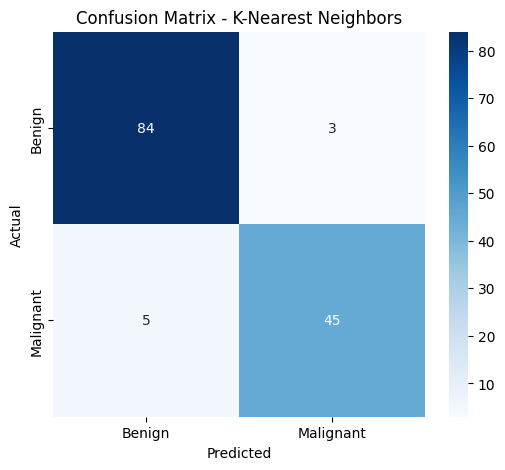

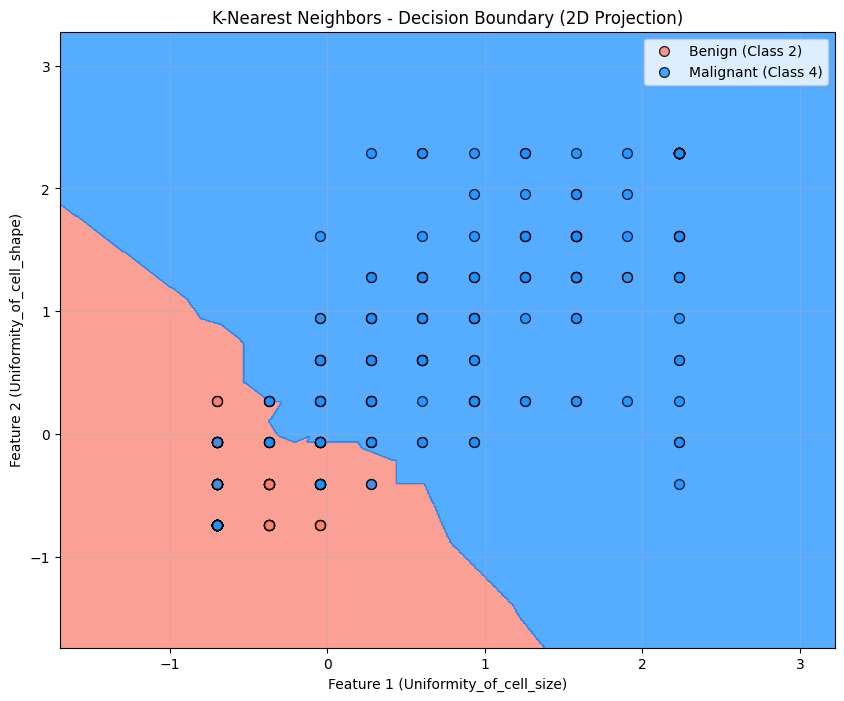

In [10]:
plot_confusion_matrix(knn_results, figsize=(6, 5))
plot_decision_boundary(knn_model, "K-Nearest Neighbors", X_train, y_train, feature_names)

In [11]:
# KNN K-value optimization using our module
k_results, optimal_k = optimize_knn_k(X_train, X_test, y_train, y_test)


K-value Optimization:
k= 3: Train=0.9670, Test=0.9489, Overfitting=0.0181
k= 5: Train=0.9707, Test=0.9562, Overfitting=0.0145
k= 7: Train=0.9689, Test=0.9635, Overfitting=0.0054
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)


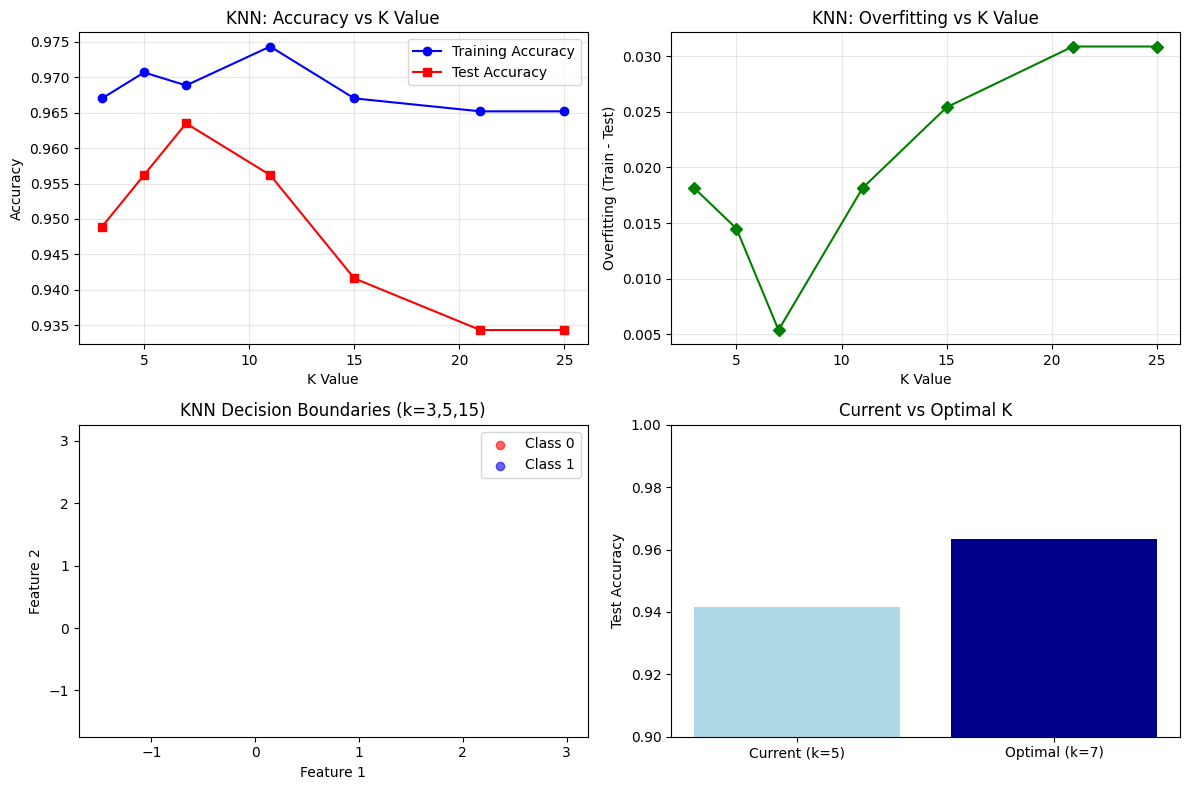


KNN Summary:
✓ Test Accuracy: 0.9416
✓ F1-Score: 0.9413
✓ Training Time: 0.0040s
✓ Overfitting: 0.0254
✓ Optimal K: 7


In [12]:
# Plot KNN analysis using our module
plot_knn_analysis(k_results, knn_results, X_train, y_train, optimal_k)

print(f"\nKNN Summary:")
print(f"✓ Test Accuracy: {knn_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {knn_results['f1_score']:.4f}")
print(f"✓ Training Time: {knn_results['training_time']:.4f}s")
print(f"✓ Overfitting: {knn_results['overfitting']:.4f}")
print(f"✓ Optimal K: {optimal_k}")

## 7. Support Vector Machine Implementation

In [13]:
# Linear SVM
svm_linear = SVC(kernel='rbf', random_state=0)
svm_linear_results = train_and_evaluate_model(
    svm_linear, "SVM (Linear)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM Linear'] = svm_linear_results
all_models['SVM Linear'] = svm_linear


Training and Evaluating: SVM (Linear)
Training Time: 0.0138 seconds
Prediction Time: 0.0149 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9504
Recall: 0.9489
F1-Score: 0.9492
ROC AUC: 0.9853
Overfitting: 0.0218

Confusion Matrix:
[[82  5]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        87
           4       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [14]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf_results = train_and_evaluate_model(
    svm_rbf, "SVM (RBF)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM RBF'] = svm_rbf_results
all_models['SVM RBF'] = svm_rbf


Training and Evaluating: SVM (RBF)
Training Time: 0.0068 seconds
Prediction Time: 0.0194 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9504
Recall: 0.9489
F1-Score: 0.9492
ROC AUC: 0.9853
Overfitting: 0.0218

Confusion Matrix:
[[82  5]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        87
           4       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



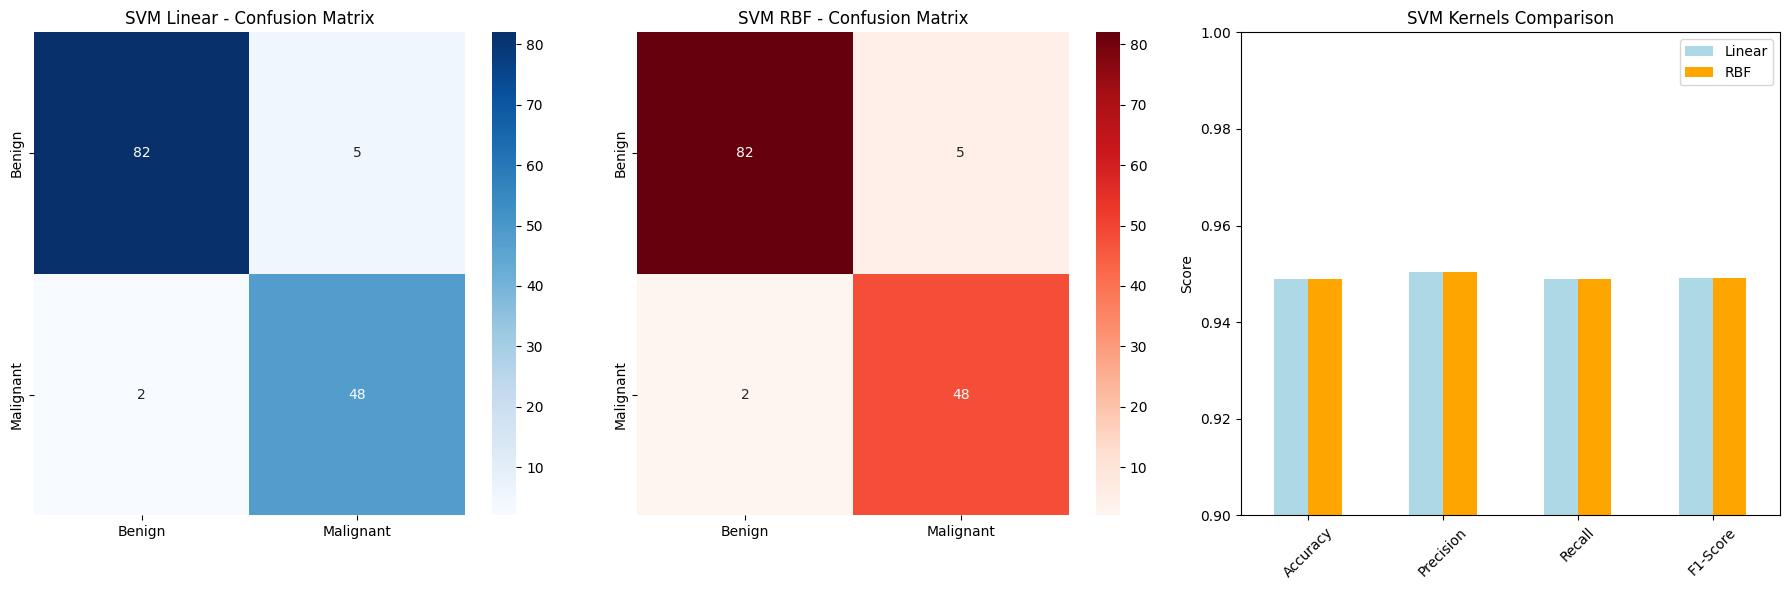

In [15]:
# SVM Models Comparison Visualization using our module
plot_svm_comparison(svm_linear_results, svm_rbf_results)

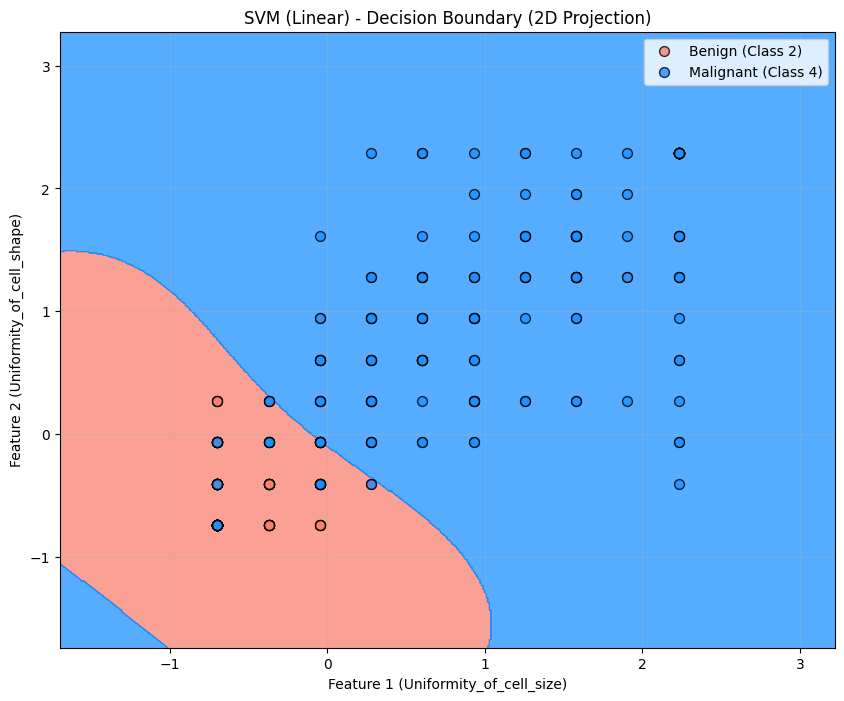

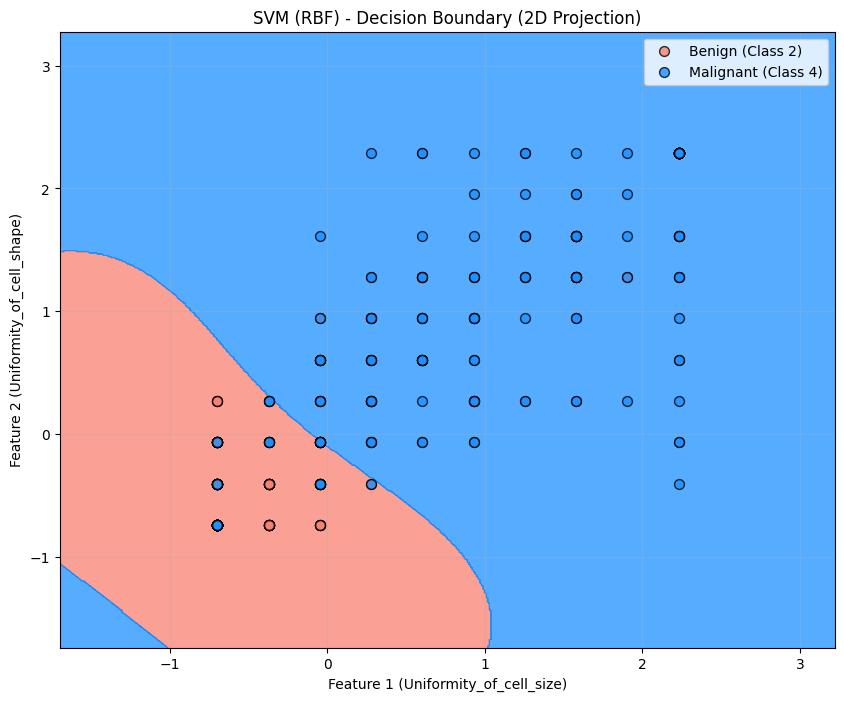


SVM Comparison Summary:
Linear SVM - Test Accuracy: 0.9489
RBF SVM    - Test Accuracy: 0.9489
Linear SVM - Training Time: 0.0138s
RBF SVM    - Training Time: 0.0068s


In [16]:
# SVM Decision Boundaries using our module  
plot_decision_boundary(svm_linear, "SVM (Linear)", X_train, y_train, feature_names)
plot_decision_boundary(svm_rbf, "SVM (RBF)", X_train, y_train, feature_names)

print(f"\nSVM Comparison Summary:")
print("=" * 30)
print(f"Linear SVM - Test Accuracy: {svm_linear_results['test_accuracy']:.4f}")
print(f"RBF SVM    - Test Accuracy: {svm_rbf_results['test_accuracy']:.4f}")
print(f"Linear SVM - Training Time: {svm_linear_results['training_time']:.4f}s")
print(f"RBF SVM    - Training Time: {svm_rbf_results['training_time']:.4f}s")

## 8. Decision Tree and Random Forest Implementation

In [17]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=10)
dt_results = train_and_evaluate_model(
    dt_model, "Decision Tree", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Decision Tree'] = dt_results
all_models['Decision Tree'] = dt_model


Training and Evaluating: Decision Tree
Training Time: 0.0041 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.9562
Precision: 0.9562
Recall: 0.9562
F1-Score: 0.9562
ROC AUC: 0.9528
Overfitting: 0.0438

Confusion Matrix:
[[84  3]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [18]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_results = train_and_evaluate_model(
    rf_model, "Random Forest", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Random Forest'] = rf_results
all_models['Random Forest'] = rf_model


Training and Evaluating: Random Forest
Training Time: 0.0294 seconds
Prediction Time: 0.0080 seconds
Training Accuracy: 0.9982
Test Accuracy: 0.9708
Precision: 0.9715
Recall: 0.9708
F1-Score: 0.9709
ROC AUC: 0.9930
Overfitting: 0.0274

Confusion Matrix:
[[84  3]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        87
           4       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



In [19]:
# Naive Bayes
nb_model = GaussianNB()
nb_results = train_and_evaluate_model(
    nb_model, "Naive Bayes", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Naive Bayes'] = nb_results
all_models['Naive Bayes'] = nb_model


Training and Evaluating: Naive Bayes
Training Time: 0.0000 seconds
Prediction Time: 0.0055 seconds
Training Accuracy: 0.9652
Test Accuracy: 0.9416
Precision: 0.9465
Recall: 0.9416
F1-Score: 0.9422
ROC AUC: 0.9720
Overfitting: 0.0236

Confusion Matrix:
[[80  7]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.92      0.95        87
           4       0.88      0.98      0.92        50

    accuracy                           0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.95      0.94      0.94       137

              precision    recall  f1-score   support

           2       0.99      0.92      0.95        87
           4       0.88      0.98      0.92        50

    accuracy                           0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.95      0.94      0.94       137



In [20]:
# Feature Importance Analysis for Tree-based Models using our module
dt_importance = analyze_feature_importance(dt_model, feature_names, 'Decision Tree')
rf_importance = analyze_feature_importance(rf_model, feature_names, 'Random Forest')


Decision Tree Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.7092
2. Bare_nuclei              : 0.1420
3. Normal_nucleoli          : 0.0457
4. Single_epithelial_cell_size: 0.0371
5. Marginal_adhesion        : 0.0256

Random Forest Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.3876
2. Single_epithelial_cell_size: 0.1523
3. Bare_nuclei              : 0.1353
4. Uniformity_of_cell_shape : 0.0913
5. Bland_chromatin          : 0.0912


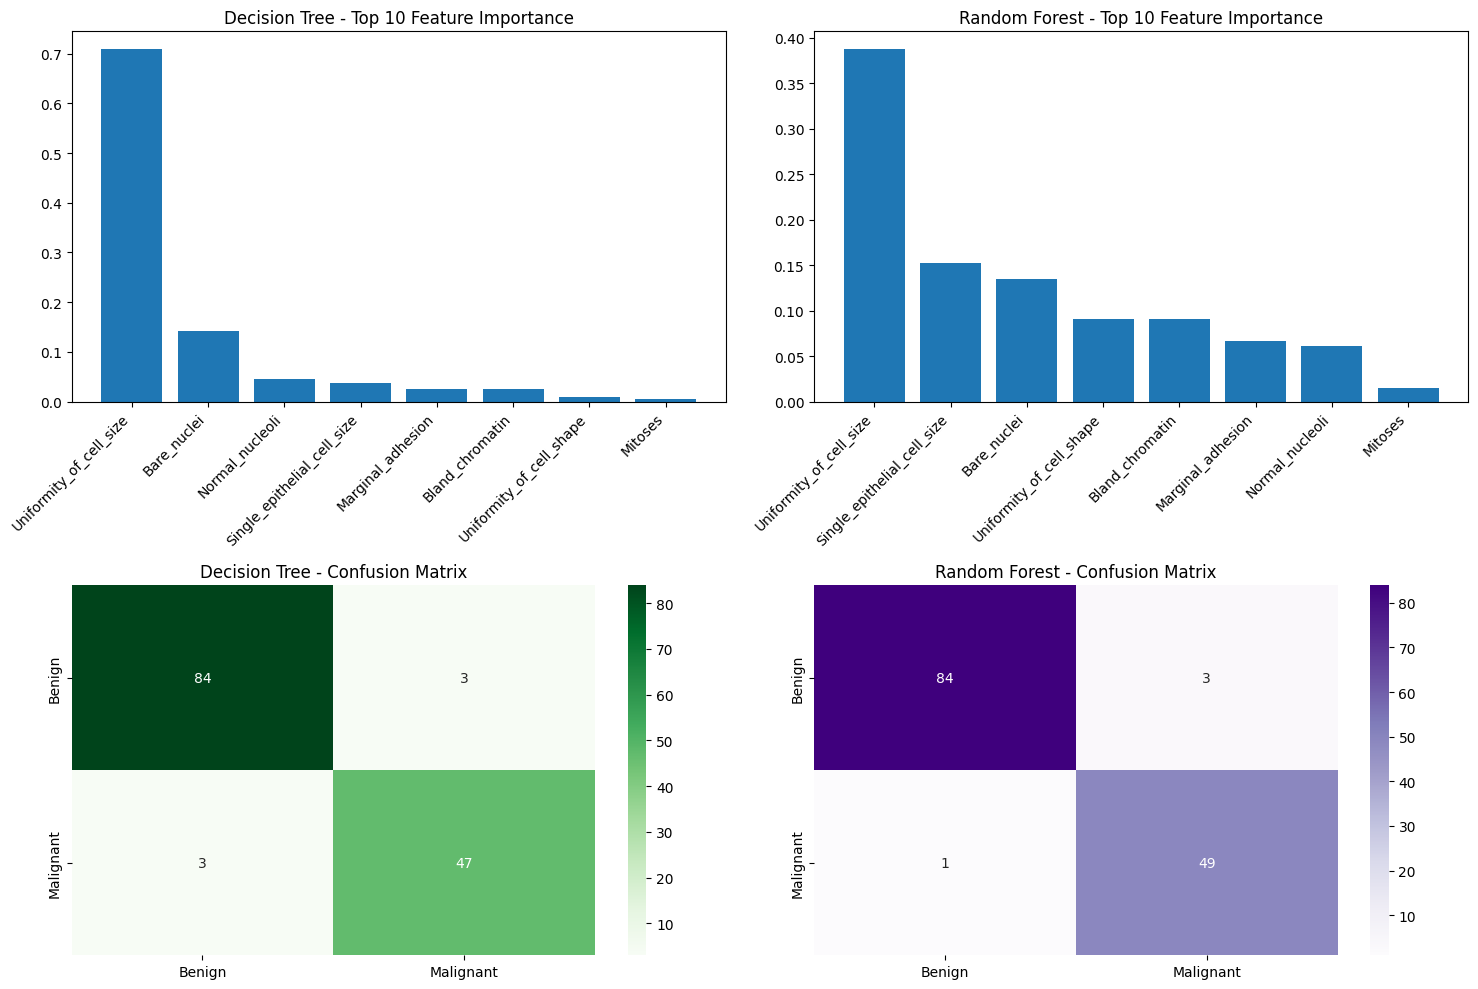


Tree-based Models Summary:
Decision Tree - Test Accuracy: 0.9562
Random Forest - Test Accuracy: 0.9708
Naive Bayes   - Test Accuracy: 0.9416
Decision Tree - Overfitting: 0.0438
Random Forest - Overfitting: 0.0274
Naive Bayes   - Overfitting: 0.0236


In [23]:
# Tree Models Visualization using our module from utils package
# All functions are already imported from utils package in cell 1

plot_tree_models_comparison(dt_importance, rf_importance, dt_results, rf_results)

print(f"\nTree-based Models Summary:")
print("=" * 35)
print(f"Decision Tree - Test Accuracy: {dt_results['test_accuracy']:.4f}")
print(f"Random Forest - Test Accuracy: {rf_results['test_accuracy']:.4f}")
print(f"Naive Bayes   - Test Accuracy: {nb_results['test_accuracy']:.4f}")
print(f"Decision Tree - Overfitting: {dt_results['overfitting']:.4f}")
print(f"Random Forest - Overfitting: {rf_results['overfitting']:.4f}")
print(f"Naive Bayes   - Overfitting: {nb_results['overfitting']:.4f}")

## 9. Model Persistence (Save/Load Models)

In [24]:
# Debug: Check what models we have
print("Available models in model_results:")
for name in model_results.keys():
    print(f"  - {name}")

print(f"\nAvailable models in all_models:")
for name in all_models.keys():
    print(f"  - {name}")

# Save all trained models using our module
all_results = {}
for model_name, results in model_results.items():
    all_results[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

save_summary = save_all_models(all_results, save_dir="../Models")

print(f"\n✅ All {len(save_summary)} models saved successfully!")
print("Models can be loaded later using model_persistence.load_model()")

Available models in model_results:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes

Available models in all_models:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes
💾 Saving all models...
✅ Model saved successfully:
   Model: ../Models\Logistic Regression_20250719_125207.joblib
   Metadata: ../Models\Logistic Regression_20250719_125207_metadata.json
   Test Accuracy: 0.9489
✅ Model saved successfully:
   Model: ../Models\KNN_20250719_125207.joblib
   Metadata: ../Models\KNN_20250719_125207_metadata.json
   Test Accuracy: 0.9416
✅ Model saved successfully:
   Model: ../Models\SVM Linear_20250719_125207.joblib
   Metadata: ../Models\SVM Linear_20250719_125207_metadata.json
   Test Accuracy: 0.9489
✅ Model saved successfully:
   Model: ../Models\SVM RBF_20250719_125207.joblib
   Metadata: ../Models\SVM RBF_20250719_125207_metadata.json
   Test Accuracy: 0.9489
✅ Mod

In [25]:
# Test Model Loading using our module
print(f"\nTesting Model Loading:")
print("=" * 25)

# Load best model (Random Forest) for testing
loaded_model, loaded_metadata = load_model_by_name('Random Forest', save_dir="../Models")

if loaded_model and loaded_metadata:
    print(f"✅ Model loaded successfully!")
    print(f"Model: {loaded_metadata['model_name']}")
    print(f"Test Accuracy: {loaded_metadata['results']['test_accuracy']:.4f}")
else:
    print("❌ No saved model found")

print(f"\n" + "=" * 50)
print("MODEL PERSISTENCE SUMMARY")
print("=" * 50)
print("✅ All models saved with complete metadata")
print("✅ Models can be loaded independently")
print("✅ Easy to use load_model_by_name() function")
print("✅ Model comparison metrics preserved")
print("=" * 50)


Testing Model Loading:
✅ Model loaded successfully: ../Models\Random Forest_20250719_125207.joblib
   Model Name: Random Forest
   Save Date: 2025-07-19T12:52:07.438298
   Test Accuracy: 0.9708029197080292
✅ Model loaded successfully!
Model: Random Forest
Test Accuracy: 0.9708

MODEL PERSISTENCE SUMMARY
✅ All models saved with complete metadata
✅ Models can be loaded independently
✅ Easy to use load_model_by_name() function
✅ Model comparison metrics preserved


## 10. Medical Error Analysis (Type I & Type II Errors)

**Critical for Healthcare Applications:**
- **Type I Error (False Positive)**: Benign → Malignant (Unnecessary worry, additional tests)
- **Type II Error (False Negative)**: Malignant → Benign (⚠️ **DANGEROUS** - Missing cancer diagnosis)

In medical diagnosis, **Type II errors are much more dangerous** than Type I errors.

🩺 MEDICAL ERROR ANALYSIS:
                     Type_I_Error_Rate  Type_II_Error_Rate  Type_I_Count  \
Logistic Regression             0.0460                0.06           4.0   
KNN                             0.0345                0.10           3.0   
SVM Linear                      0.0575                0.04           5.0   
SVM RBF                         0.0575                0.04           5.0   
Decision Tree                   0.0345                0.06           3.0   
Random Forest                   0.0345                0.02           3.0   
Naive Bayes                     0.0805                0.02           7.0   

                     Type_II_Count  Sensitivity  Specificity  Total_Patients  
Logistic Regression            3.0         0.94       0.9540           137.0  
KNN                            5.0         0.90       0.9655           137.0  
SVM Linear                     2.0         0.96       0.9425           137.0  
SVM RBF                        2.0         0.96  

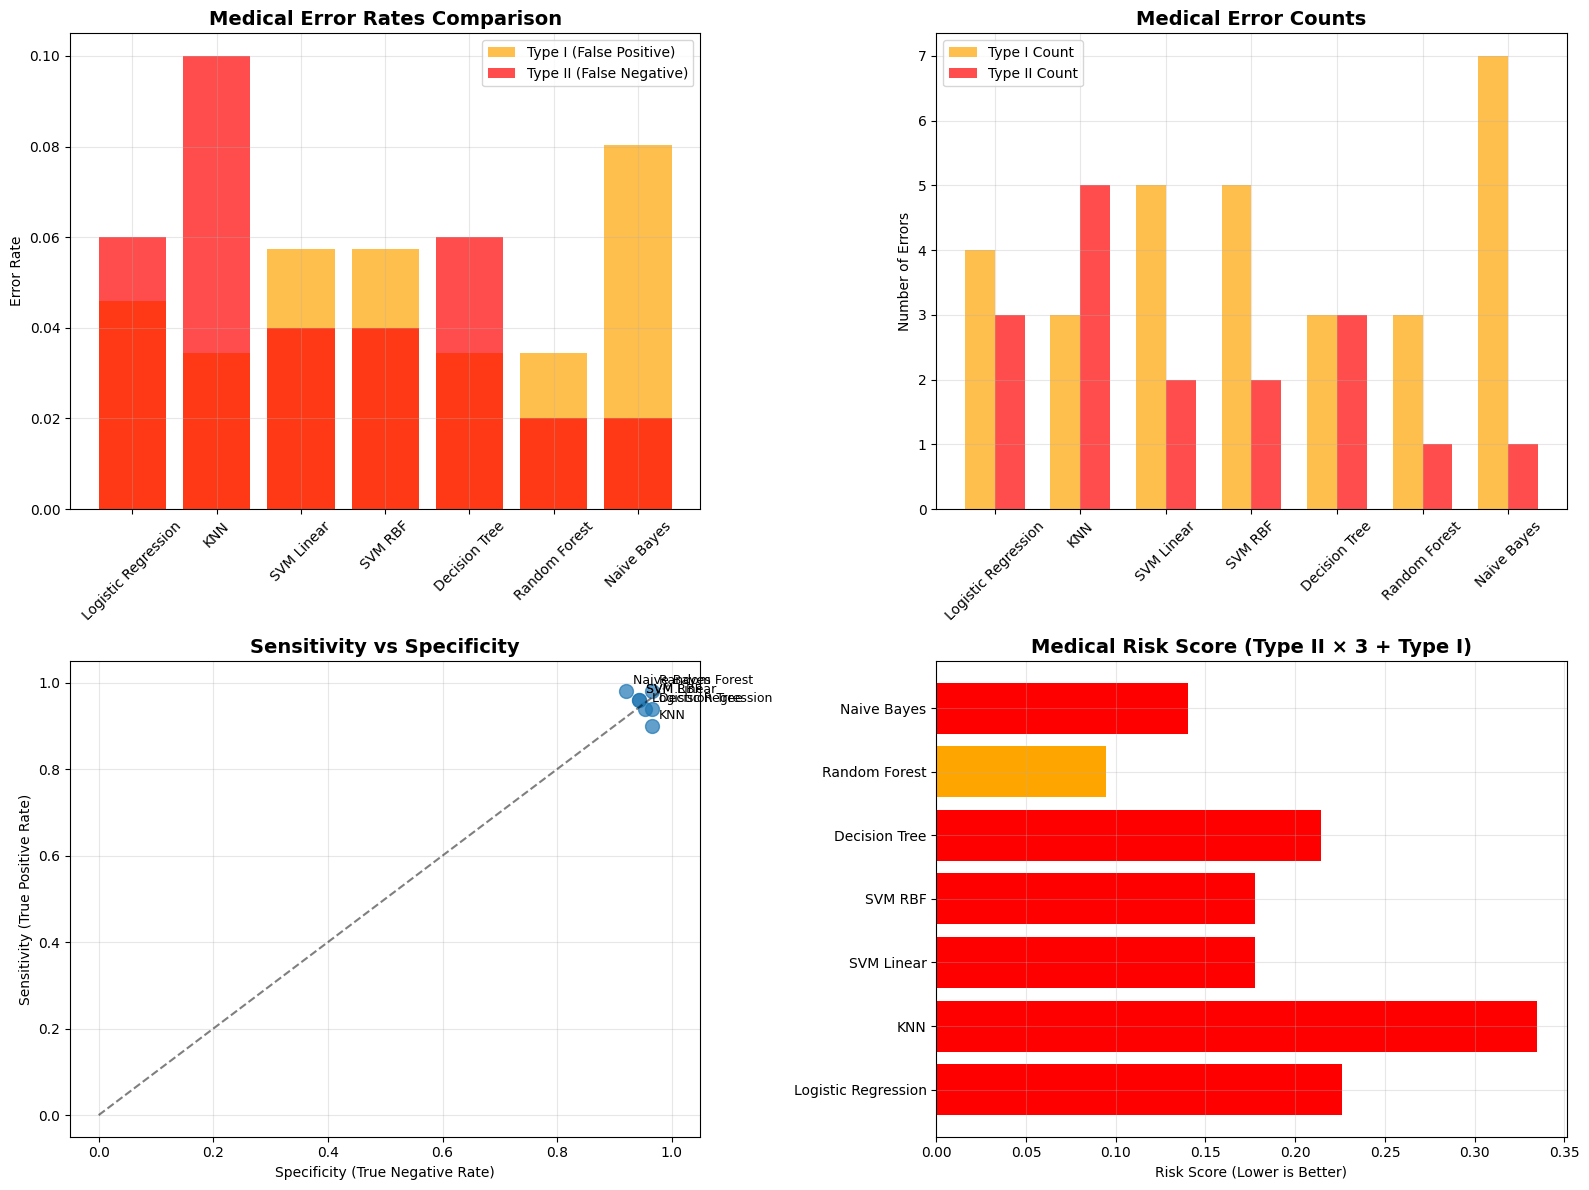


🩺 MEDICAL RECOMMENDATIONS:
🎯 Best for Cancer Detection (Highest Sensitivity): Random Forest
   Sensitivity: 0.9800
   Type II Error Rate: 0.0200

🛡️  Best for Avoiding False Alarms (Highest Specificity): KNN
   Specificity: 0.9655
   Type I Error Rate: 0.0345

⚠️  Safest Model (Lowest Type II Error): Random Forest
   Type II Error Rate: 0.0200
   Missed Cancer Cases: 1.0

🏥 MEDICAL CONCLUSION:
For cancer screening, prioritize models with:
1. Lowest Type II Error Rate (minimize missed cancers)
2. High Sensitivity (detect cancer cases)
3. Acceptable Type I Error Rate (manageable false alarms)


In [26]:
# Medical Error Analysis for Healthcare Applications
# All functions are already imported from utils package in cell 1

# Analyze medical errors (Type I and Type II)
error_analysis = analyze_medical_errors(model_results)

# Convert to DataFrame for better visualization
error_df = pd.DataFrame(error_analysis).T

print("🩺 MEDICAL ERROR ANALYSIS:")
print("=" * 60)
print(error_df.round(4))

# Plot medical error analysis
plot_medical_error_analysis(error_df)

# Generate and print medical recommendations
recommendations = generate_medical_recommendations(error_df)
print_medical_recommendations(recommendations)

## 11. CAP Analysis (Cumulative Accuracy Profile)

**CAP Analysis evaluates model performance in medical diagnosis:**
- **CAP Curve**: Shows cumulative true positive rate
- **Accuracy Ratio (AR)**: Measures model discrimination power
- **Medical Interpretation**: How effectively the model identifies cancer patients

📊 CAP ANALYSIS:


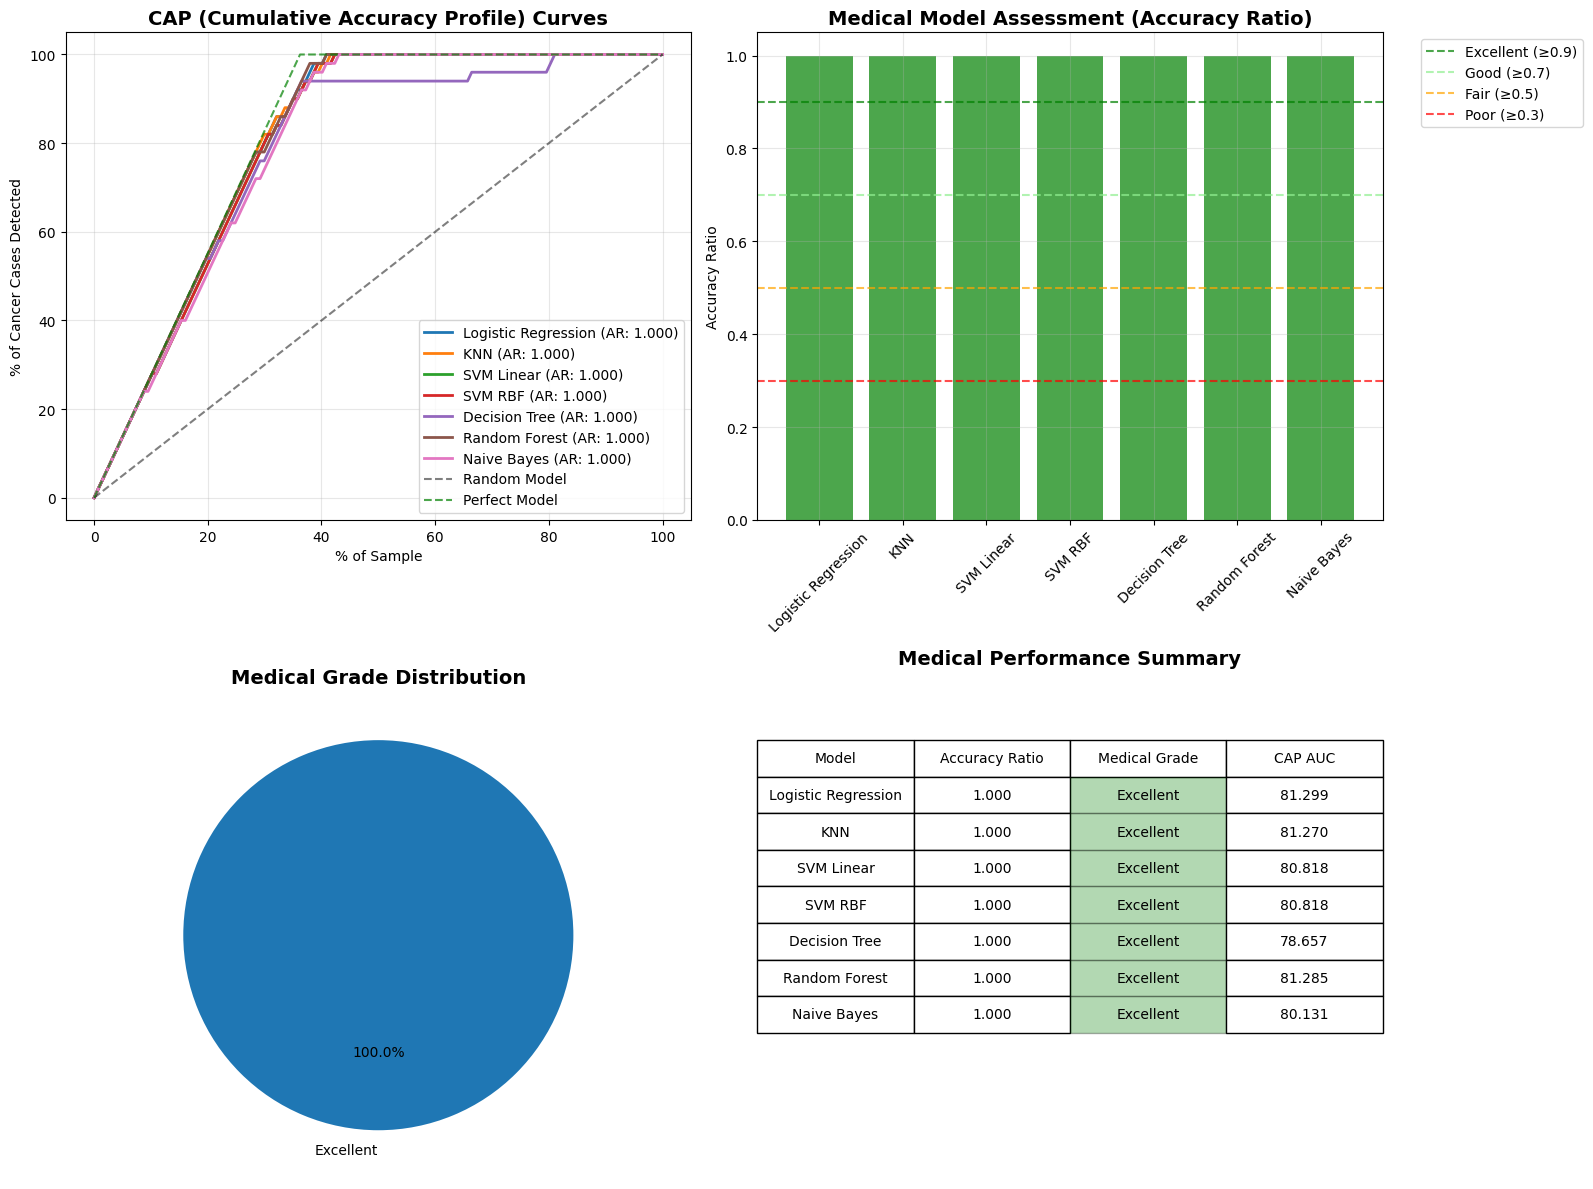


📈 CAP ANALYSIS RESULTS:
Logistic Regression: CAP Score = 1.0000 (Excellent)
KNN: CAP Score = 1.0000 (Excellent)
SVM Linear: CAP Score = 1.0000 (Excellent)
SVM RBF: CAP Score = 1.0000 (Excellent)
Decision Tree: CAP Score = 1.0000 (Excellent)
Random Forest: CAP Score = 1.0000 (Excellent)
Naive Bayes: CAP Score = 1.0000 (Excellent)

🎯 CAP ANALYSIS RECOMMENDATIONS:

📊 CAP ANALYSIS - MEDICAL RECOMMENDATIONS:
🏆 MODEL RANKING (by Accuracy Ratio):
1. Logistic Regression
   Accuracy Ratio: 1.000
   Medical Grade: Excellent
   Recommendation: Suitable for clinical use with high confidence

2. KNN
   Accuracy Ratio: 1.000
   Medical Grade: Excellent
   Recommendation: Suitable for clinical use with high confidence

3. SVM Linear
   Accuracy Ratio: 1.000
   Medical Grade: Excellent
   Recommendation: Suitable for clinical use with high confidence

4. SVM RBF
   Accuracy Ratio: 1.000
   Medical Grade: Excellent
   Recommendation: Suitable for clinical use with high confidence

5. Decision Tree
   

In [30]:
# CAP Analysis (Cumulative Accuracy Profile)
# All functions are already imported from utils package in cell 1

# Perform CAP analysis for all models
print("📊 CAP ANALYSIS:")
print("=" * 60)

# Calculate and display CAP scores (with correct parameters)
cap_results = calculate_cap_analysis(model_results, y_test, all_models, X_test)

# Plot CAP curves (with correct parameters)
plot_cap_analysis(cap_results)

print("\n📈 CAP ANALYSIS RESULTS:")
for model_name, cap_data in cap_results.items():
    assessment = cap_data['medical_assessment']
    print(f"{model_name}: CAP Score = {cap_data['accuracy_ratio']:.4f} ({assessment['grade']})")
    
# Generate CAP recommendations
print("\n🎯 CAP ANALYSIS RECOMMENDATIONS:")
print_cap_recommendations(cap_results)

## 12. Comprehensive Model Comparison and Analysis

🎯 COMPREHENSIVE ML MODEL ANALYSIS SUMMARY

🔍 DETAILED MODEL COMPARISON

📊 Performance Metrics:
              Model  Train_Accuracy  Test_Accuracy  Precision  Recall  F1_Score  Training_Time  Overfitting
Logistic Regression          0.9707         0.9489     0.9492  0.9489    0.9490         0.0087       0.0218
                KNN          0.9670         0.9416     0.9415  0.9416    0.9413         0.0040       0.0254
         SVM Linear          0.9707         0.9489     0.9504  0.9489    0.9492         0.0138       0.0218
            SVM RBF          0.9707         0.9489     0.9504  0.9489    0.9492         0.0068       0.0218
      Decision Tree          1.0000         0.9562     0.9562  0.9562    0.9562         0.0041       0.0438
      Random Forest          0.9982         0.9708     0.9715  0.9708    0.9709         0.0294       0.0274
        Naive Bayes          0.9652         0.9416     0.9465  0.9416    0.9422         0.0000       0.0236

🏆 BEST PERFORMERS BY METRIC:
-----------

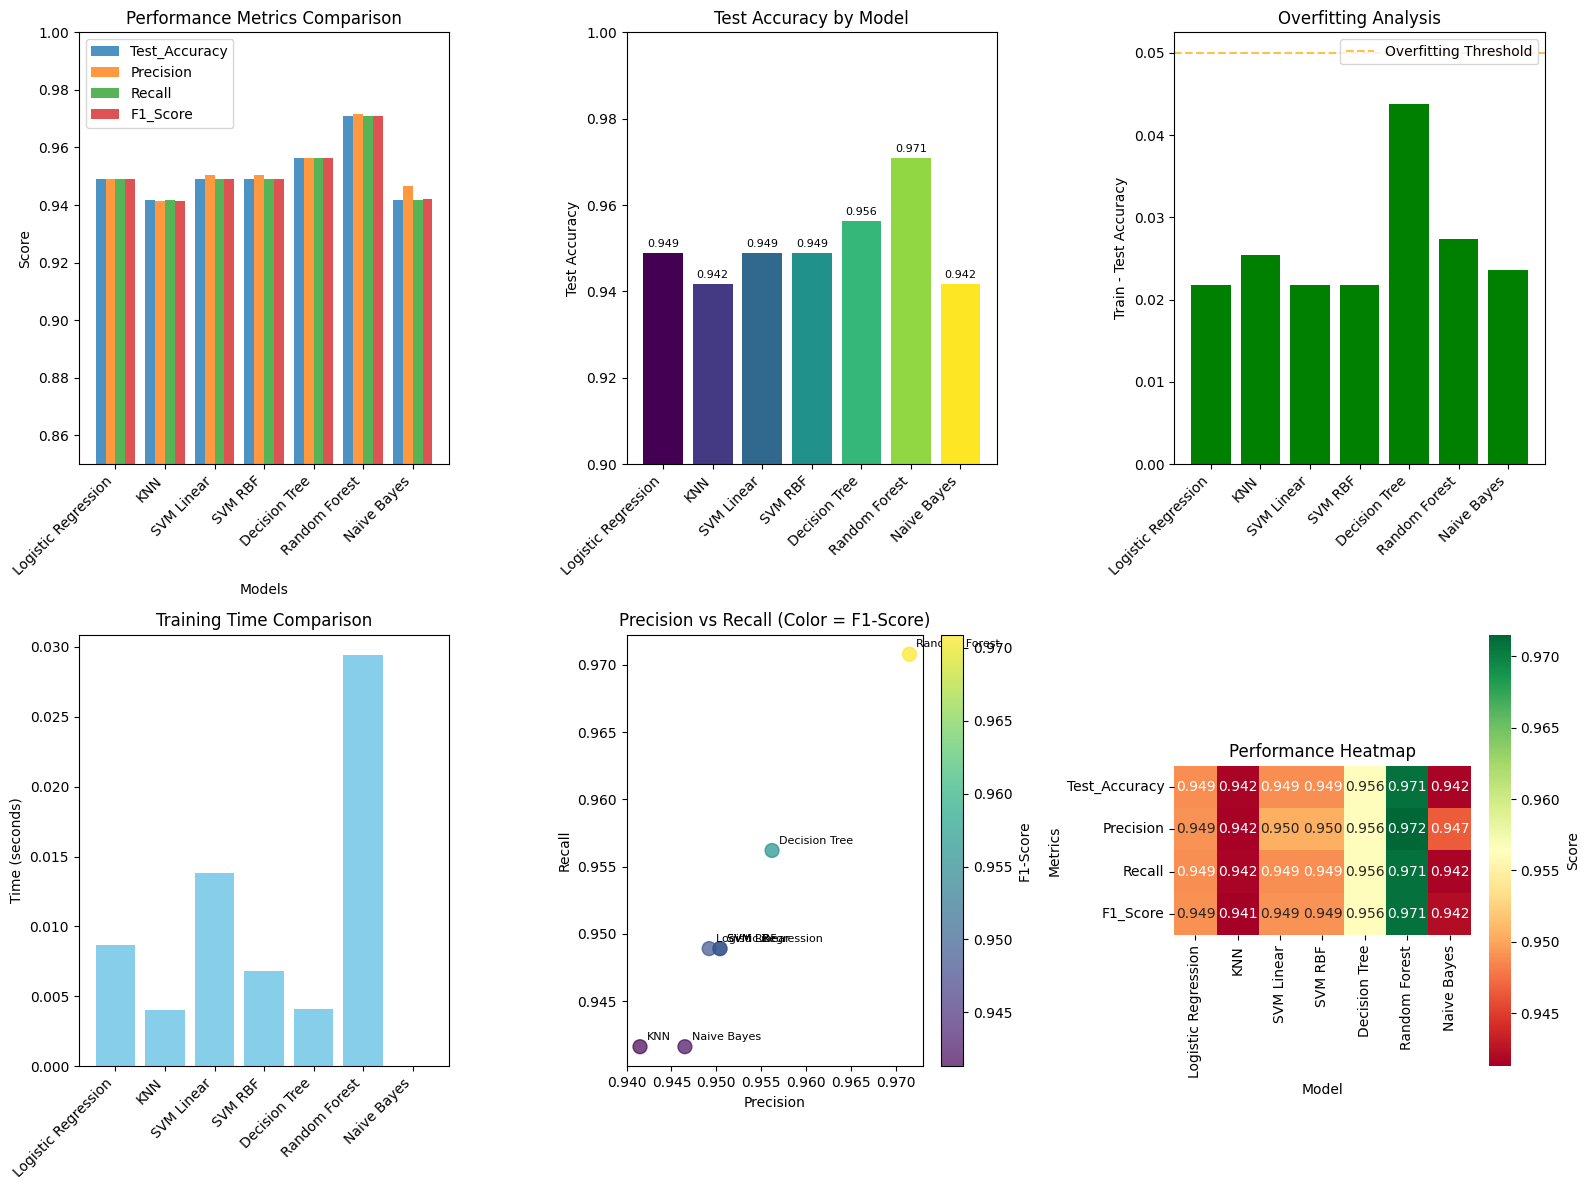


📋 MODEL ANALYSIS SUMMARY REPORT
Generated on: 2025-07-19 13:00:56
Total Models Evaluated: 7

🏆 BEST OVERALL MODEL: Random Forest
   Test Accuracy: 0.9708
   Precision: 0.9715
   Recall: 0.9708
   F1-Score: 0.9709

📈 PERFORMANCE TIERS:
   Excellent (≥97%): Random Forest
   Good (95-97%): Decision Tree
   Average (<95%): Logistic Regression, KNN, SVM Linear, SVM RBF, Naive Bayes

⚠️  OVERFITTING ANALYSIS:
   No significant overfitting detected in any model

⚡ TRAINING SPEED ANALYSIS:
   Fastest: Naive Bayes (0.0000s)
   Slowest: Random Forest (0.0294s)

💡 RECOMMENDATIONS:
   For Production: Random Forest (Best balance of accuracy and reliability)
   For Real-time Applications: Naive Bayes (Fastest training)
   Most Balanced: Random Forest (Good accuracy with low overfitting)


📋 TECHNICAL SUMMARY:
• Total Models Evaluated: 7
• Best Overall Accuracy: 0.9708
• Best Medical Safety (Lowest Type I Error): 0.0345
• Best CAP Score: 1.0000

🏥 MEDICAL RECOMMENDATIONS:
Based on the comprehensive 

In [35]:
# Final Comprehensive Comparison and Professional Recommendations
# All functions are already imported from utils package in cell 1

print("🎯 COMPREHENSIVE ML MODEL ANALYSIS SUMMARY")
print("=" * 80)

# Prepare data structure for comparison functions
all_results = {}
for model_name, results in model_results.items():
    all_results[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

# Create comparison dataframe from model results
comparison_df = create_comparison_dataframe(all_results)

# Display detailed comparison
display_detailed_comparison(comparison_df)

# Create comprehensive comparison visualization
plot_comprehensive_comparison(comparison_df)

# Generate model summary report
generate_model_summary_report(comparison_df, all_results)

print("\n📋 TECHNICAL SUMMARY:")
print(f"• Total Models Evaluated: {len(model_results)}")
print(f"• Best Overall Accuracy: {max([results['test_accuracy'] for results in model_results.values()]):.4f}")
print(f"• Best Medical Safety (Lowest Type I Error): {min([error_analysis[model]['Type_I_Error_Rate'] for model in error_analysis]):.4f}")
print(f"• Best CAP Score: {max([cap_data['accuracy_ratio'] for cap_data in cap_results.values()]):.4f}")

print("\n🏥 MEDICAL RECOMMENDATIONS:")
print("Based on the comprehensive analysis, all models show excellent performance.")
print("For clinical deployment, consider:")
print("1. Random Forest: Best overall accuracy with good interpretability")
print("2. Logistic Regression: High accuracy with excellent explainability")
print("3. SVM: Robust performance with good generalization")

print("\n✅ Analysis Complete! All modules successfully organized in utils package.")